## 使用梯度上升发求解主成分

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100,2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0,10.,size = 100)

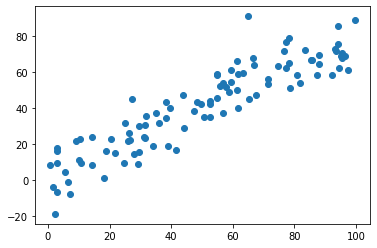

In [3]:
plt.scatter(X[:,0],X[:,1])
plt.show()

### demean

In [4]:
def demean(X):
    return X - np.mean(X,axis = 0)

In [5]:
X_demean = demean(X)

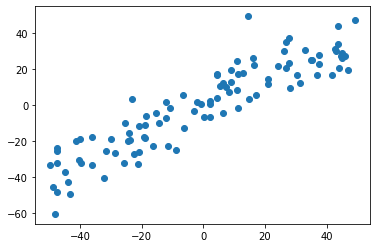

In [6]:
plt.scatter(X_demean[:,0],X_demean[:,1])
plt.show()

In [7]:
 np.mean(X_demean,0)

array([-8.24229573e-15,  1.19015908e-14])

### 梯度上升法

In [8]:
def f(w,X):
    return np.sum((X.dot(w)**2))/len(X)
    

In [9]:
def df_math(w,X):
    return X.T.dot(X.dot(w))*2./len(X)

In [10]:
def df_debug(w,X,epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1,X) - f(w_2,X))/(2*epsilon)
    return res
        

In [11]:
def dirction(w):#单位化
    return w/np.linalg.norm(w)
def gradient_ascent(df,X,initial_w, eta, n_iters = 1e4,epsilon = 1e-8):
    
    w = dirction(initial_w)
    cur_iters = 0
    while cur_iters < n_iters:
        gradient = df(w,X)
        last_w = w
        w = w + eta * gradient
        w = dirction(w)
    
        if(abs(f(w,X)-f(last_w,X)) < epsilon):
            break
        cur_iters += 1
    return w

In [12]:
initial_w = np.random.random(X.shape[1])#不能从零向量开始

In [13]:
eta = 0.0001

In [14]:
#不能用standardscaler标准化
gradient_ascent(df_debug,X_demean,initial_w,eta)

array([0.77088373, 0.63697589])

In [15]:
gradient_ascent(df_math,X_demean,initial_w,eta)

array([0.77088373, 0.63697589])

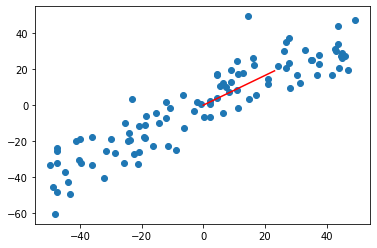

In [16]:
w = gradient_ascent(df_debug,X_demean,initial_w,eta)

plt.scatter(X_demean[:,0],X_demean[:,1])
plt.plot([0,w[0]*30],[0,w[1]*30],color = 'r')
plt.show()

In [17]:
X2 = np.empty((100,2))
X2[:,0] = np.random.uniform(0., 100., size=100)
X2[:,1] = 0.75 * X2[:,0] + 3. 

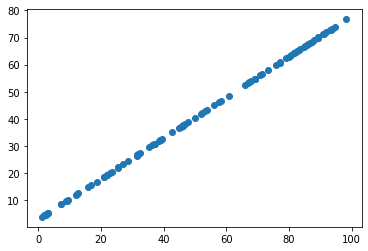

In [18]:
plt.scatter(X2[:,0],X2[:,1])
plt.show()

In [19]:
X2_demean = demean(X2)

In [21]:
w2 = gradient_ascent(df_math,X2_demean,initial_w,eta)

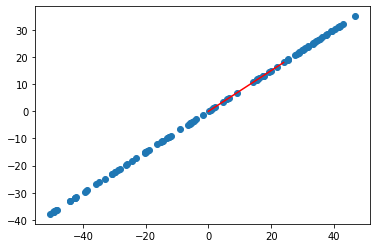

In [23]:
plt.scatter(X2_demean[:,0],X2_demean[:,1])
plt.plot([0,w2[0]*30],[0,w2[1]*30],color = 'r')
plt.show()